### Proyecto No.1
- Diego Cordóva 20312
- Paola De León 20361
- Gabriela Contreras 20213

In [1]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_sauvola, threshold_local
from skimage import exposure
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

##### PARTE NO. 1
------

**Ejemplos**

In [2]:

def calculate_metrics(gt, prediction):

    prediction_normalized = (prediction == 255).astype(np.uint8)
    accuracy = accuracy_score(gt.flatten(), prediction_normalized.flatten())
    f1 = f1_score(gt.flatten(), prediction_normalized.flatten(), zero_division=1)
    recall = recall_score(gt.flatten(), prediction_normalized.flatten(), zero_division=1)
    precision = precision_score(gt.flatten(), prediction_normalized.flatten(), zero_division=1)
    tn, fp, fn, tp = confusion_matrix(gt.flatten(), prediction_normalized.flatten()).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    return accuracy, f1, recall, specificity, precision

### Otsu Binarization

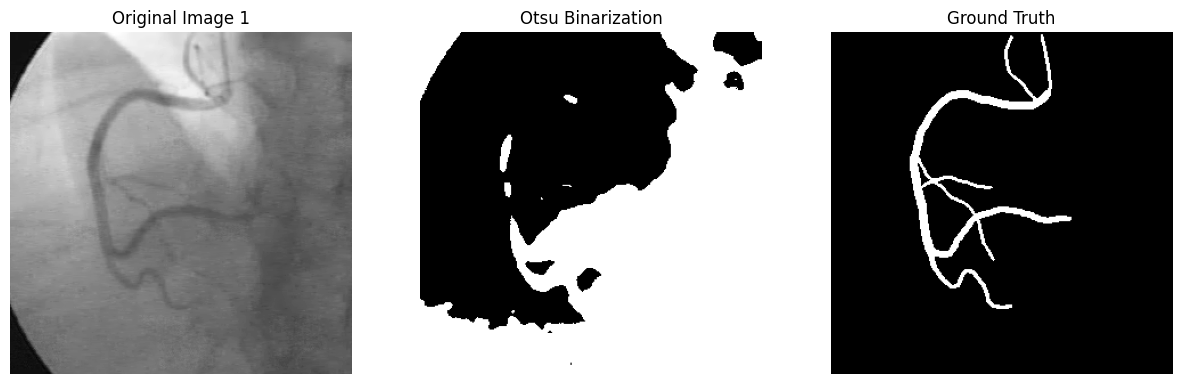

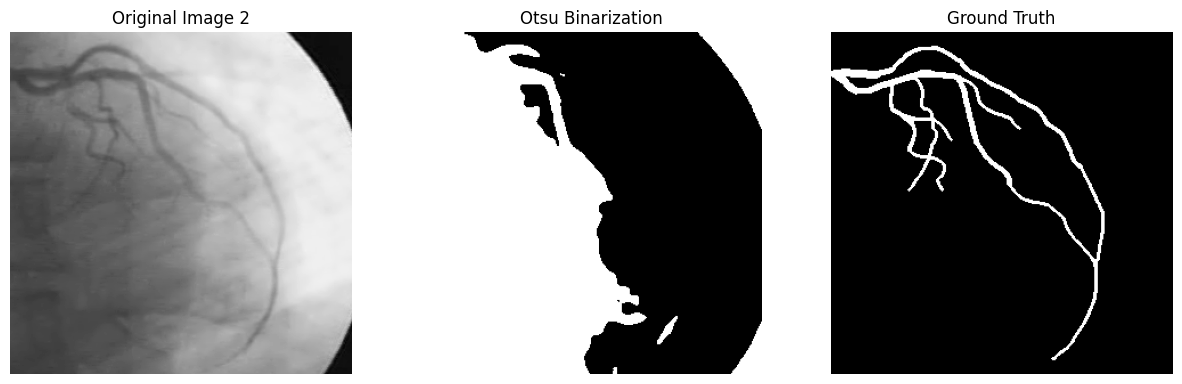

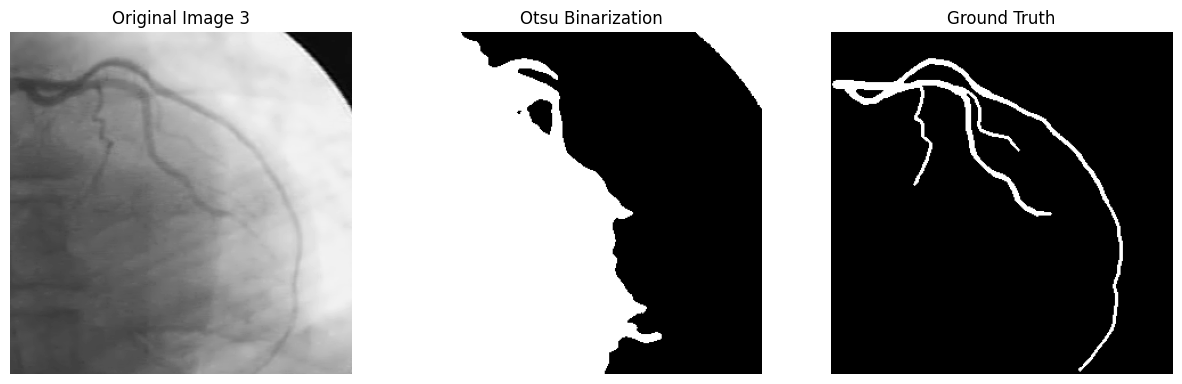

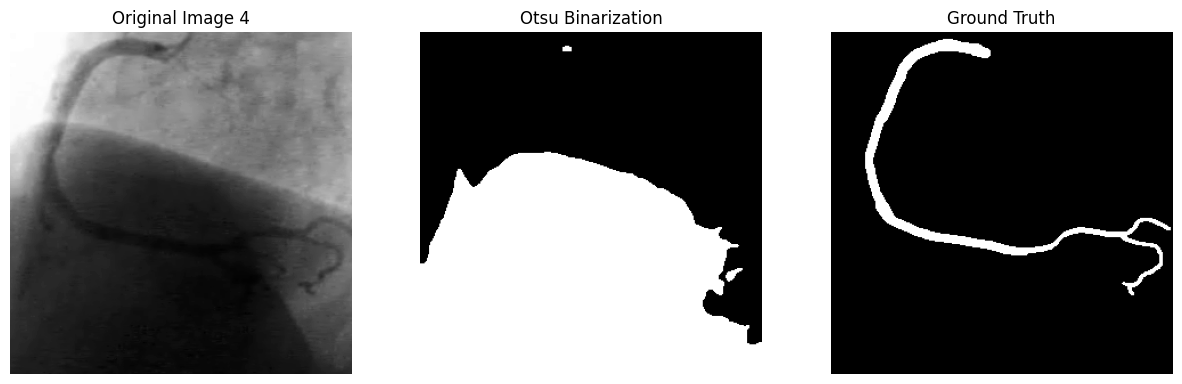

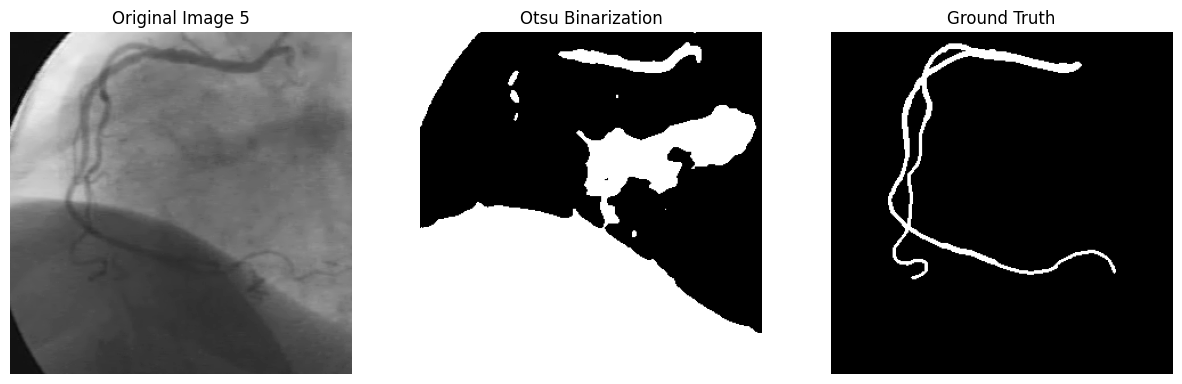

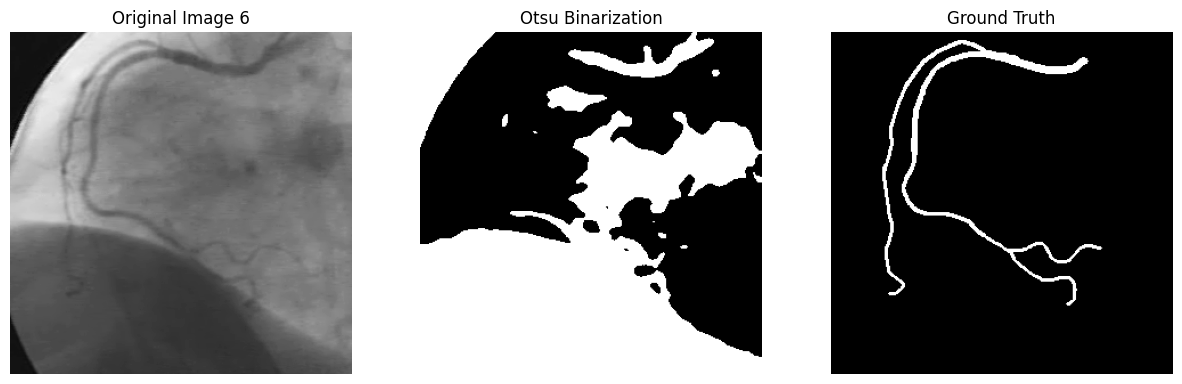

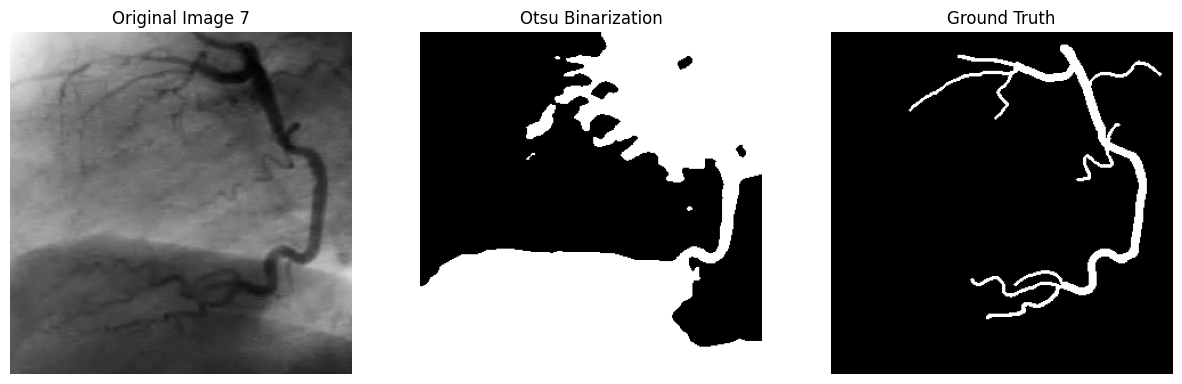

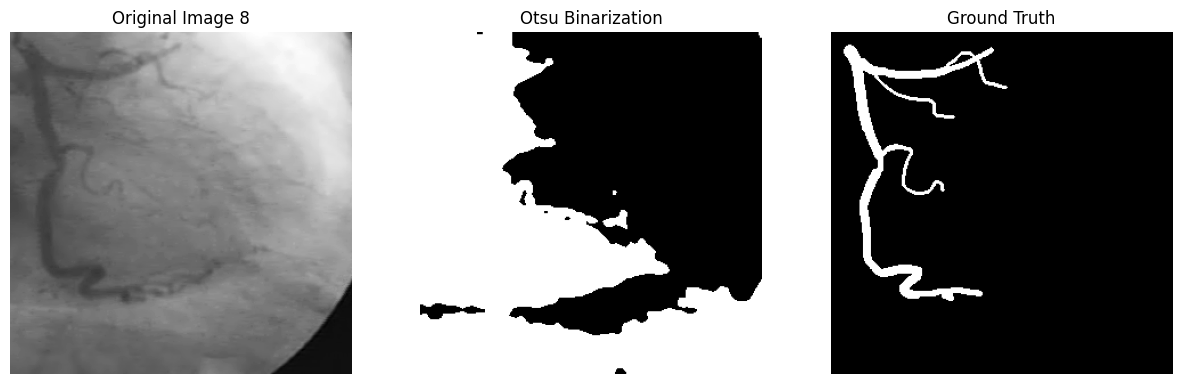

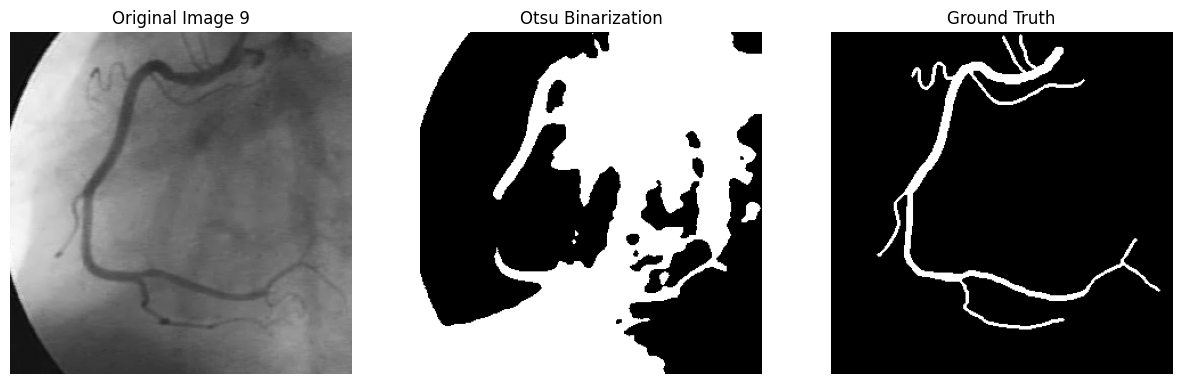

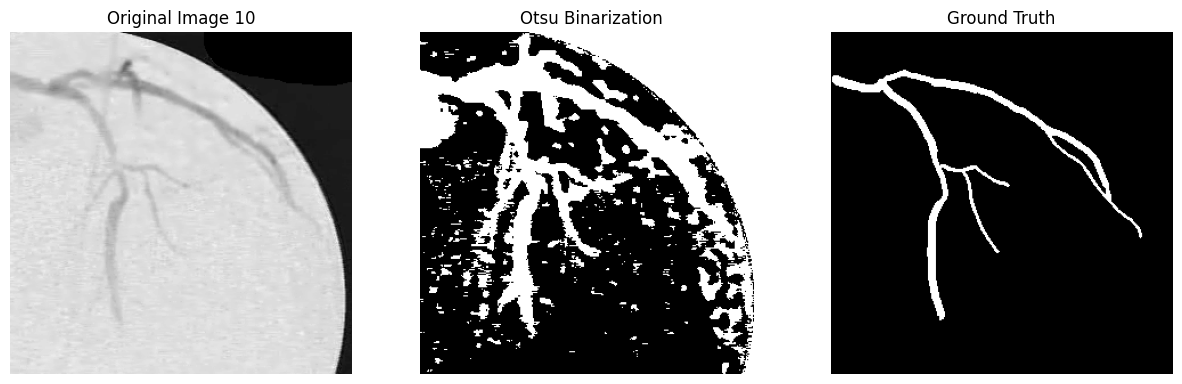

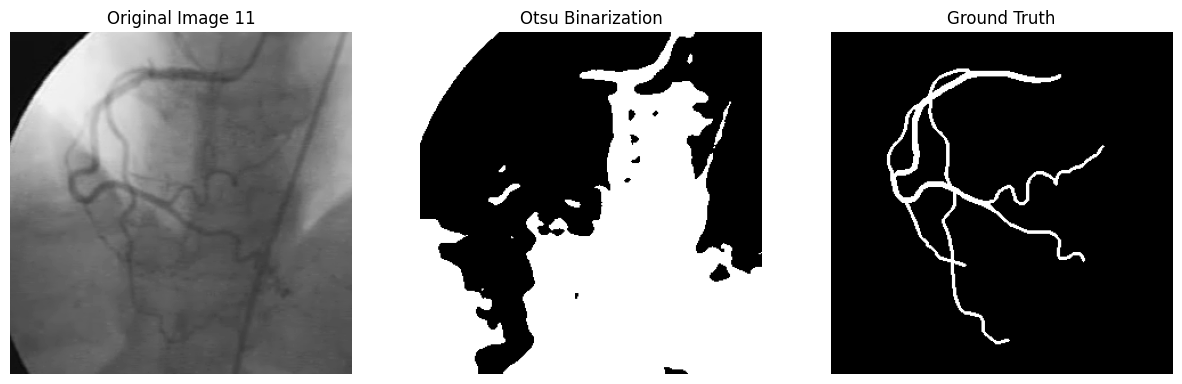

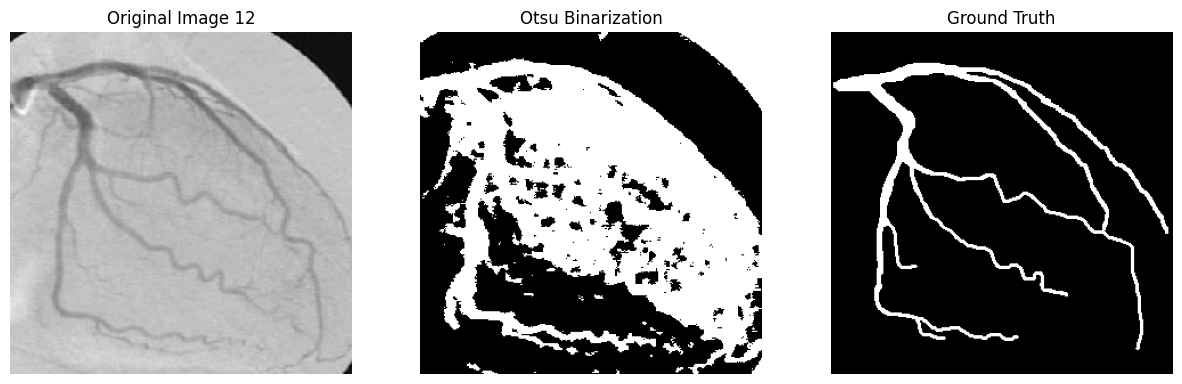

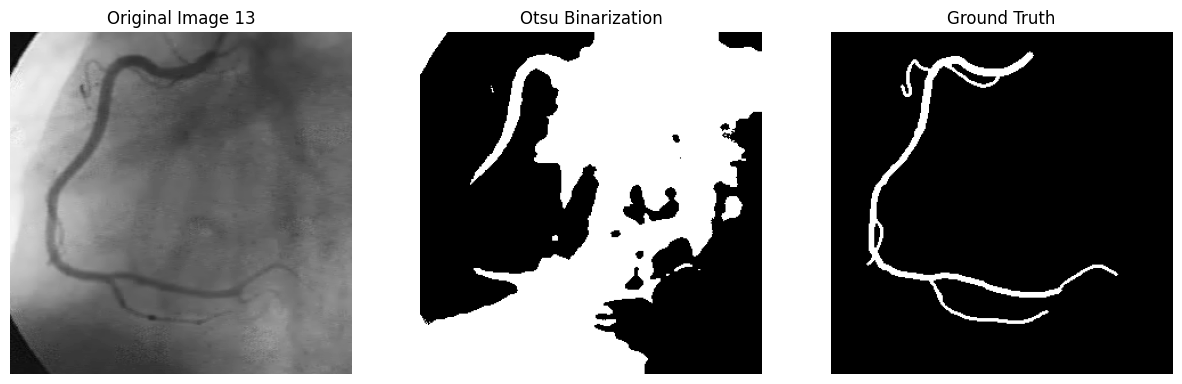

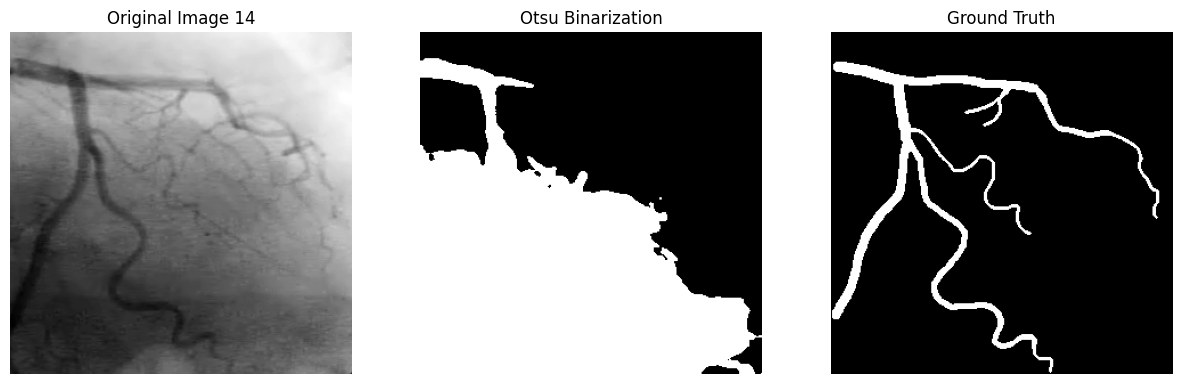

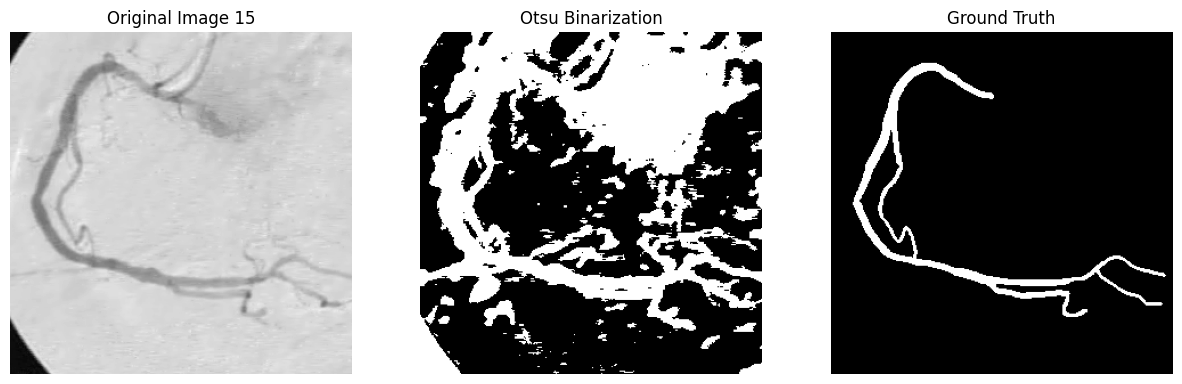

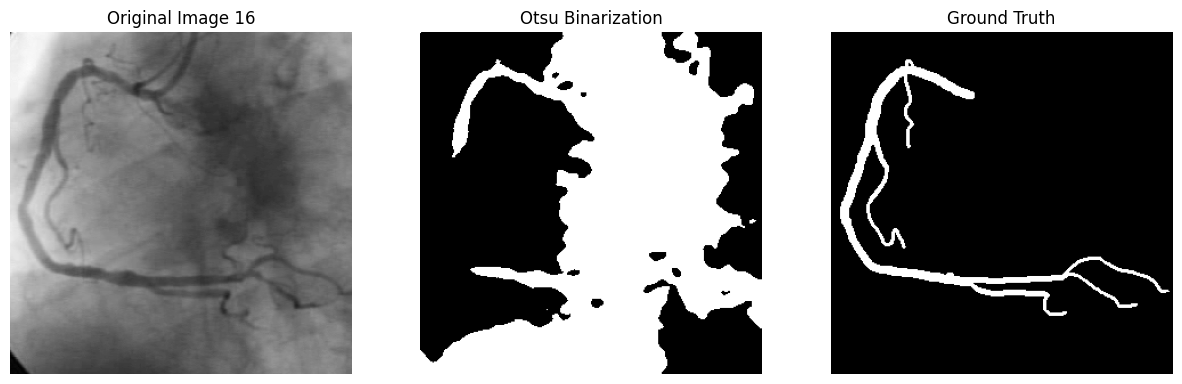

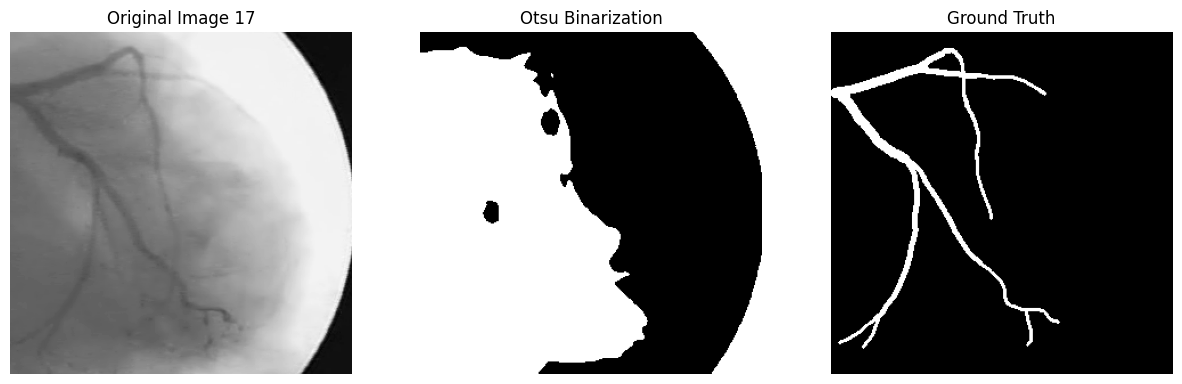

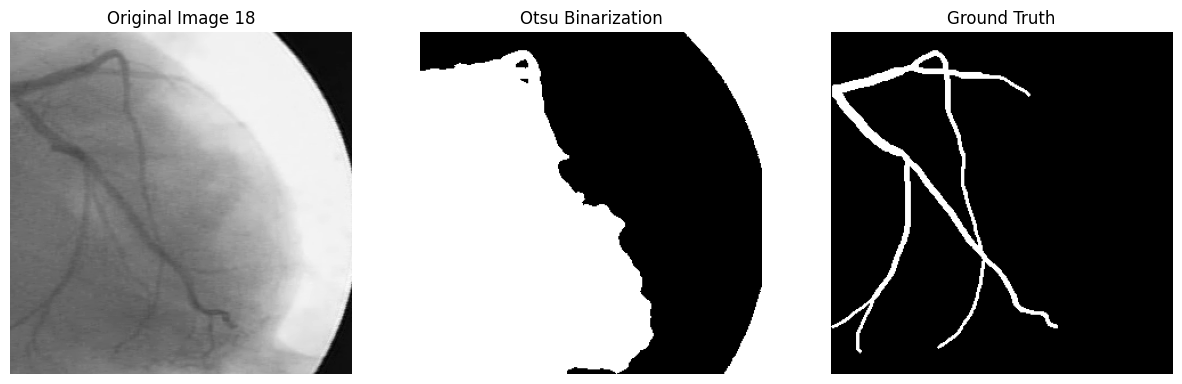

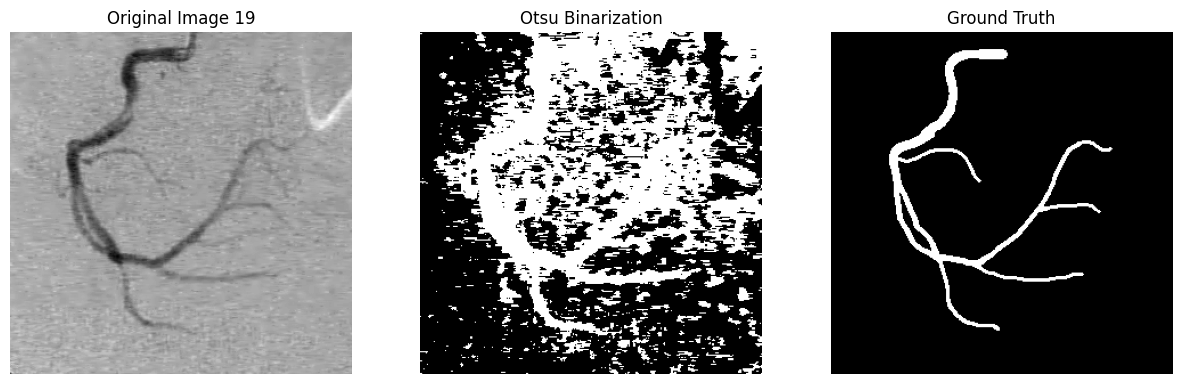

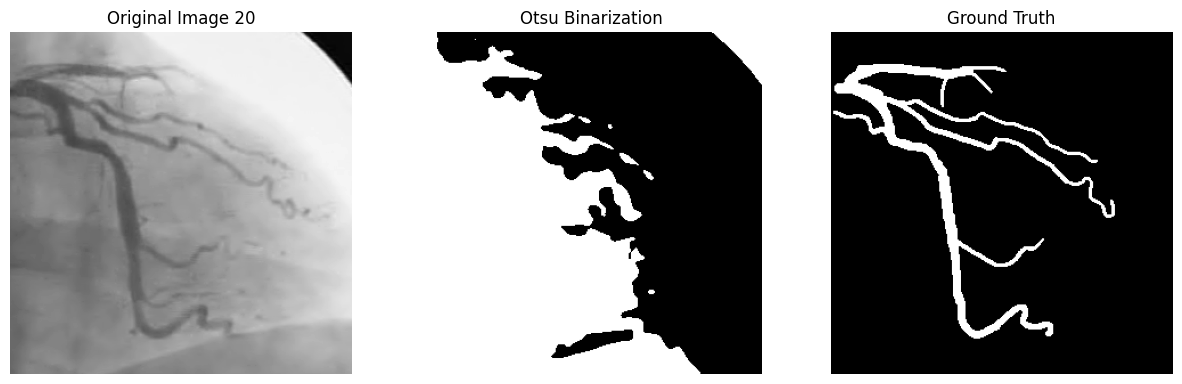


Métricas Otsu:
Accuracy: 0.5405588888888889
F1: 0.14451850783838455
Recall/Sensitivity: 0.7620887760222257
Specificity: 0.5281121660168863
Precision: 0.08019746844154482


In [3]:
otsu_metrics_sum = np.zeros(5)

for i in range(1, 21, 1):
    ruta = "./database/" + str(i) + ".pgm"
    ruta_analizada = "./database/" + str(i) + "_gt.pgm"
    original_image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    gt_image = cv2.imread(ruta_analizada, cv2.IMREAD_GRAYSCALE)
    gt_image_normalized = (gt_image == 255).astype(np.uint8)

    # Ecualización de histograma
    equalized_image = cv2.equalizeHist(original_image)

    # Filtración bilateral
    filtered_image = cv2.bilateralFilter(equalized_image, 9, 65, 65)

    # Binarización de Otsu
    _, otsu_threshold = cv2.threshold(filtered_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_threshold = 255 - otsu_threshold

    # Métricas
    otsu_metrics = np.array(calculate_metrics(gt_image_normalized, otsu_threshold))
    otsu_metrics_sum += otsu_metrics


    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title(f'Original Image {i}')
    ax[0].axis('off')

    ax[1].imshow(otsu_threshold, cmap='gray')
    ax[1].set_title('Otsu Binarization')
    ax[1].axis('off')

    ax[2].imshow(gt_image, cmap='gray')
    ax[2].set_title('Ground Truth')
    ax[2].axis('off')

    plt.show()

otsu_metrics_average = otsu_metrics_sum / 20


print('\nMétricas Otsu:')
print('Accuracy:', otsu_metrics_average[0])
print('F1:', otsu_metrics_average[1])
print('Recall/Sensitivity:', otsu_metrics_average[2])
print('Specificity:', otsu_metrics_average[3])
print('Precision:', otsu_metrics_average[4])


### Adaptive Binarization

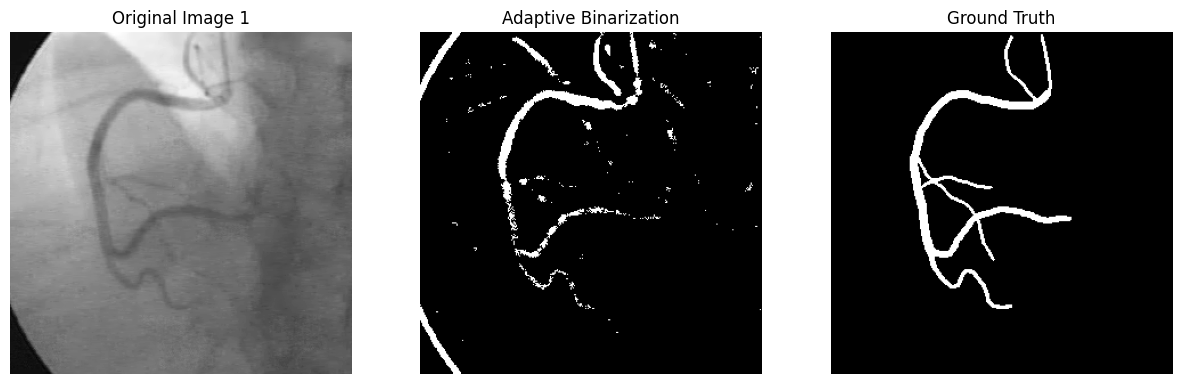

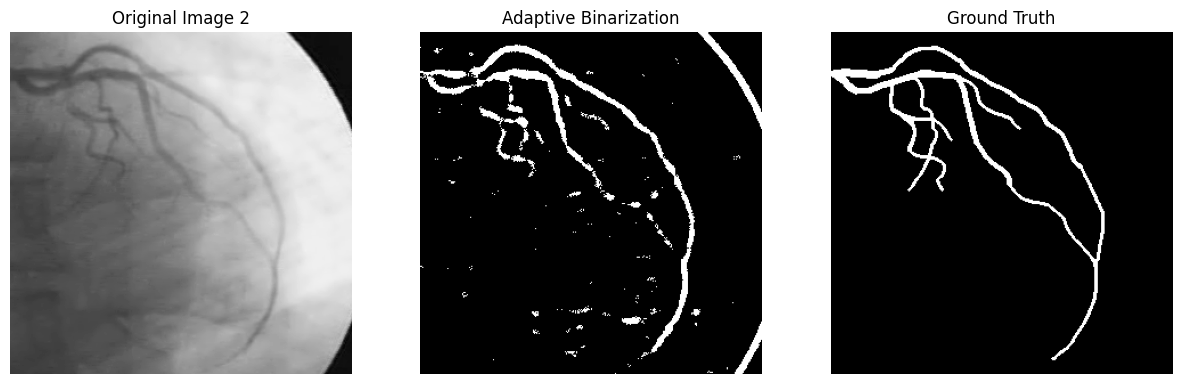

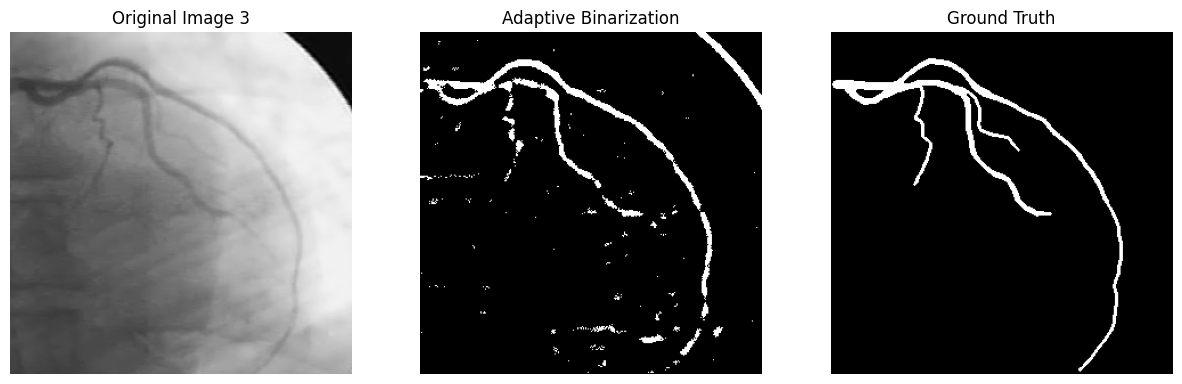

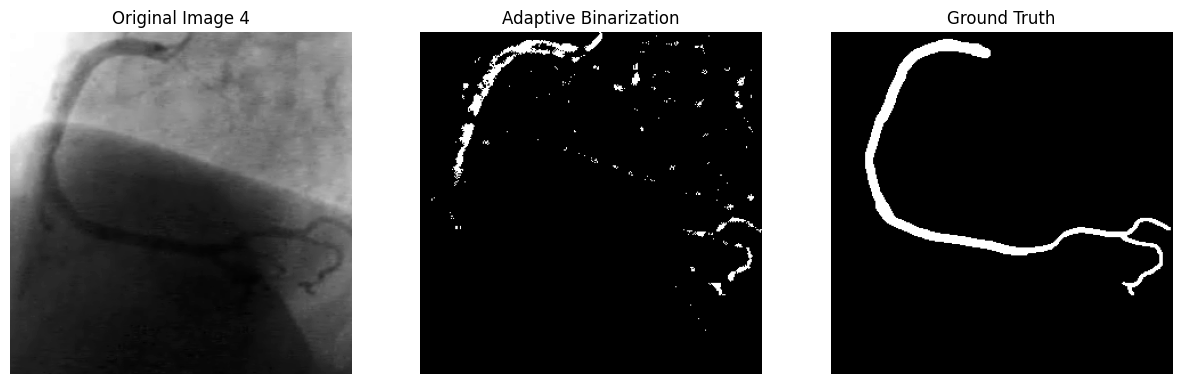

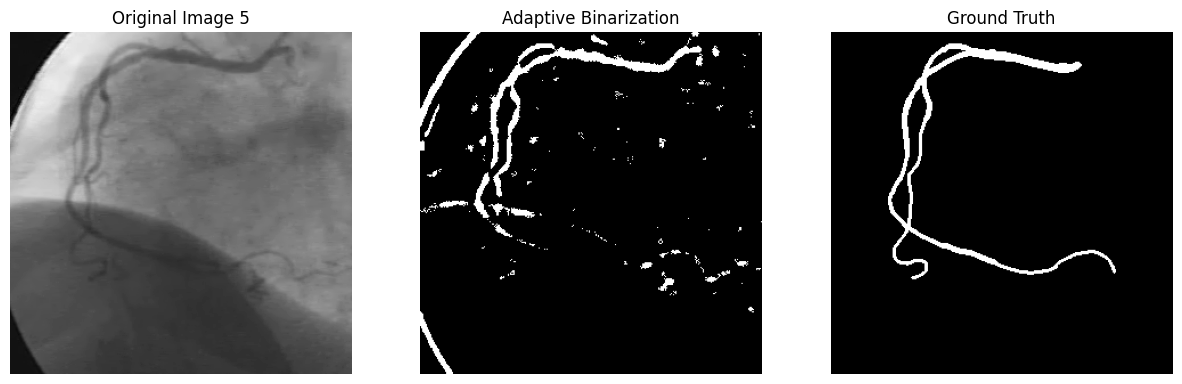

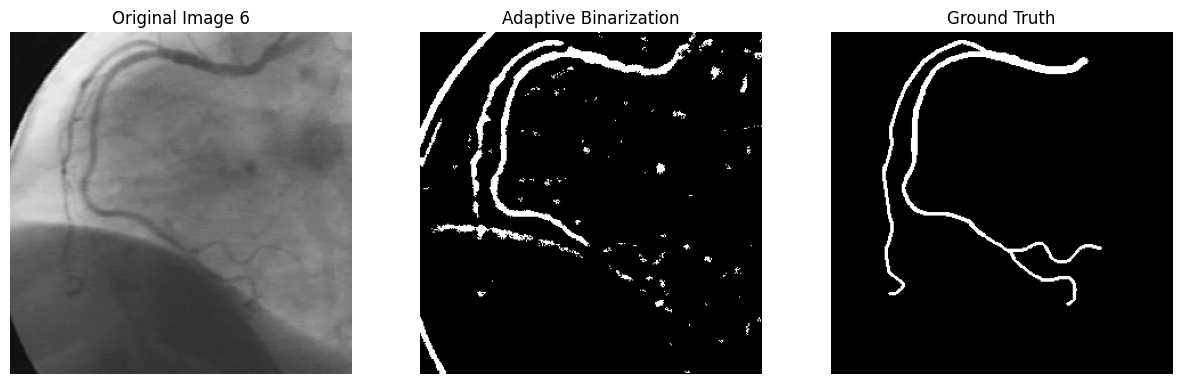

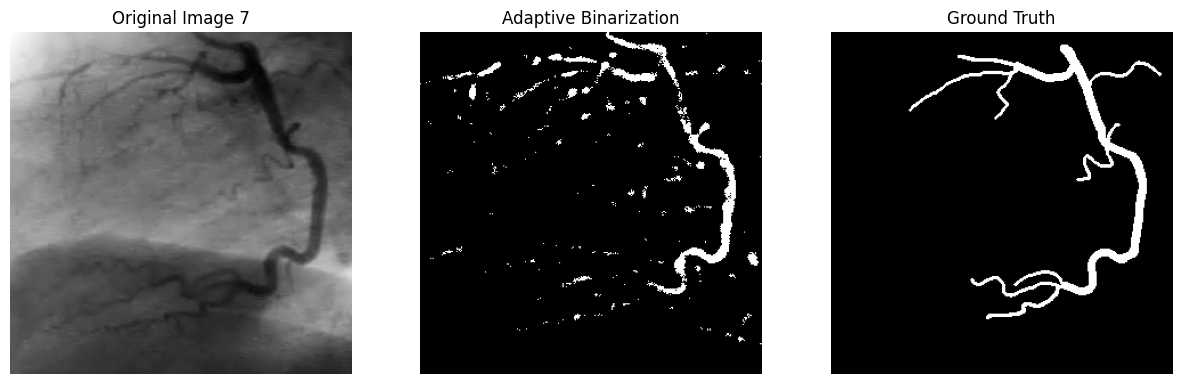

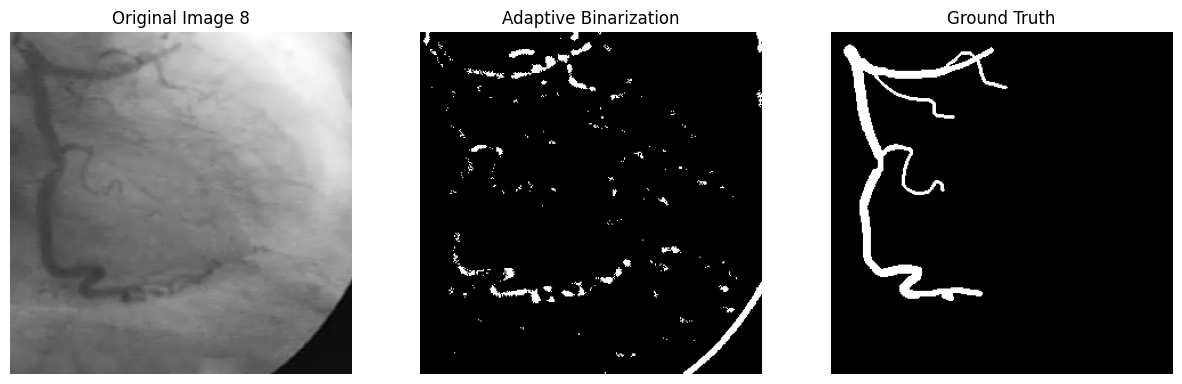

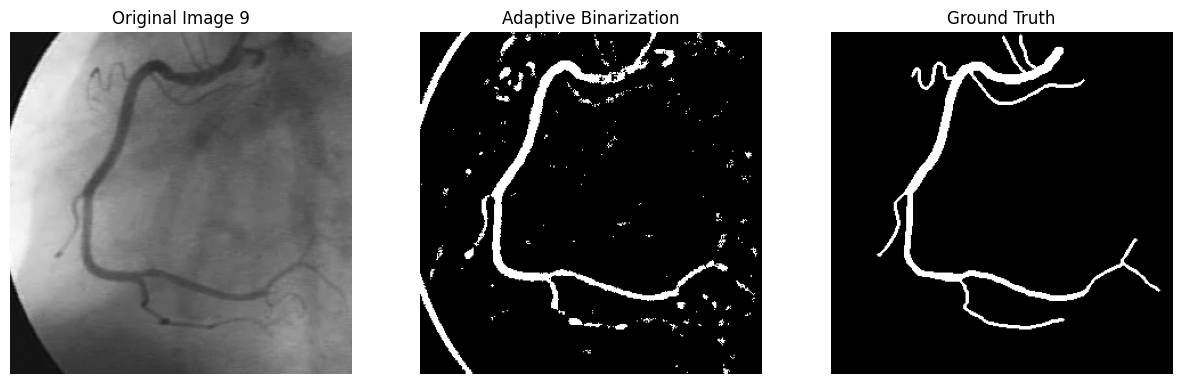

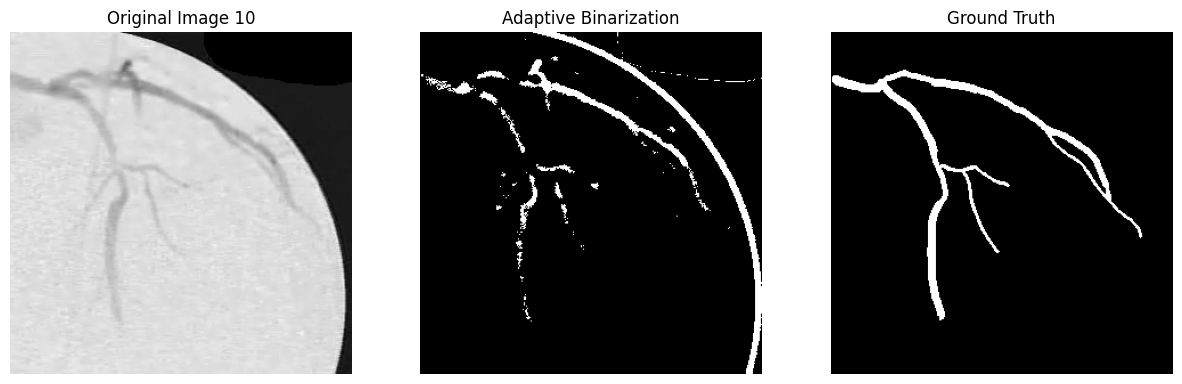

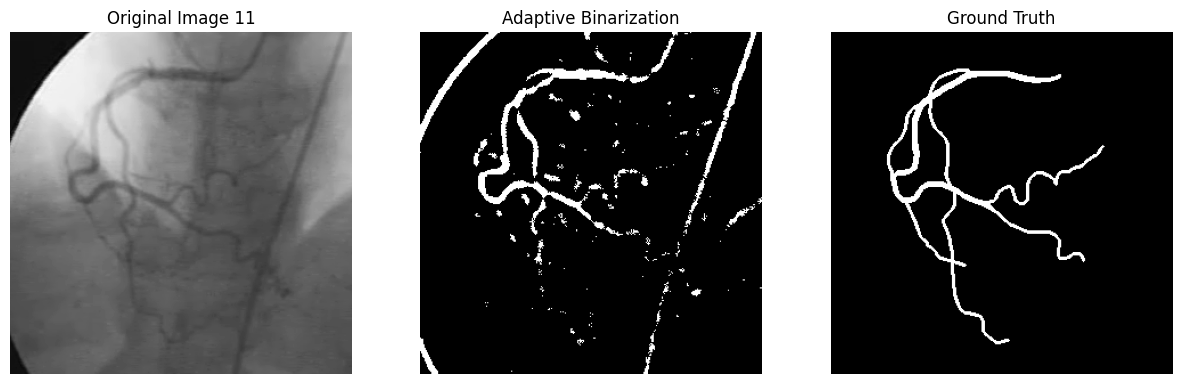

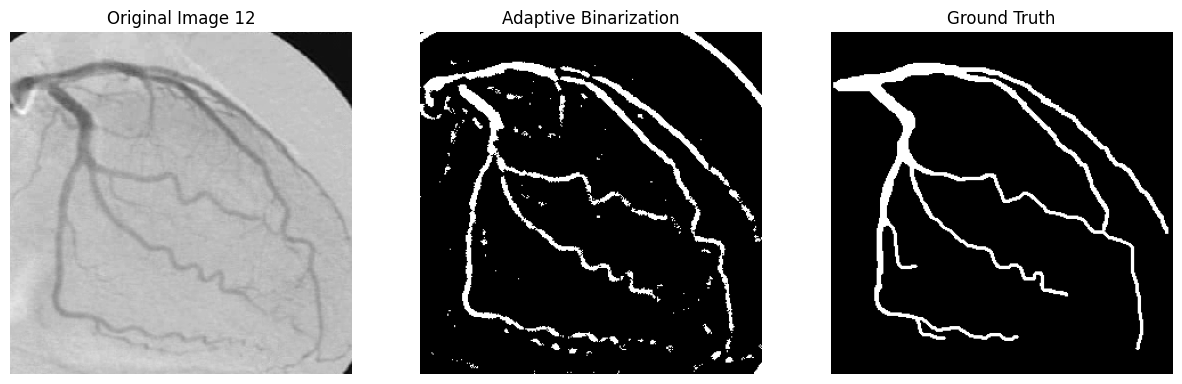

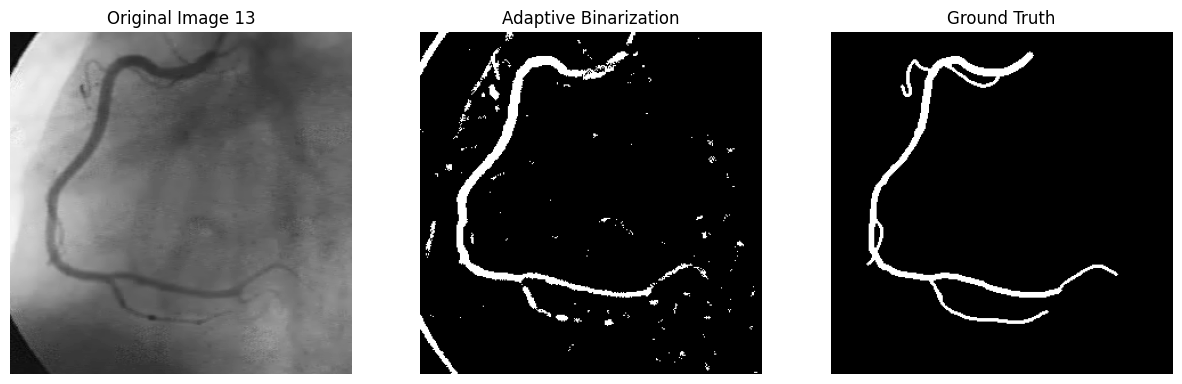

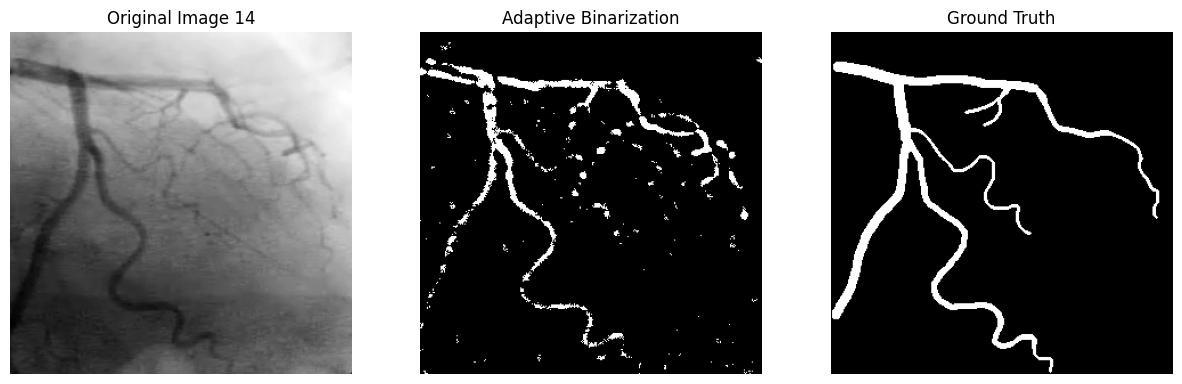

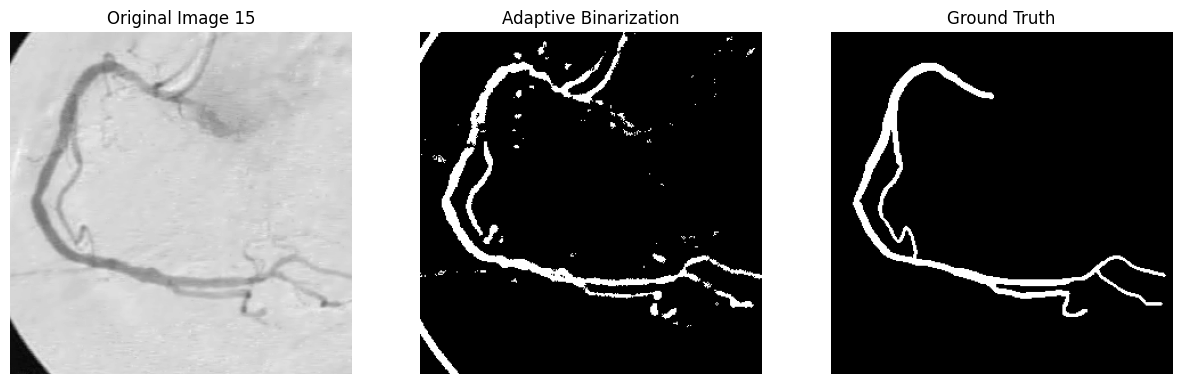

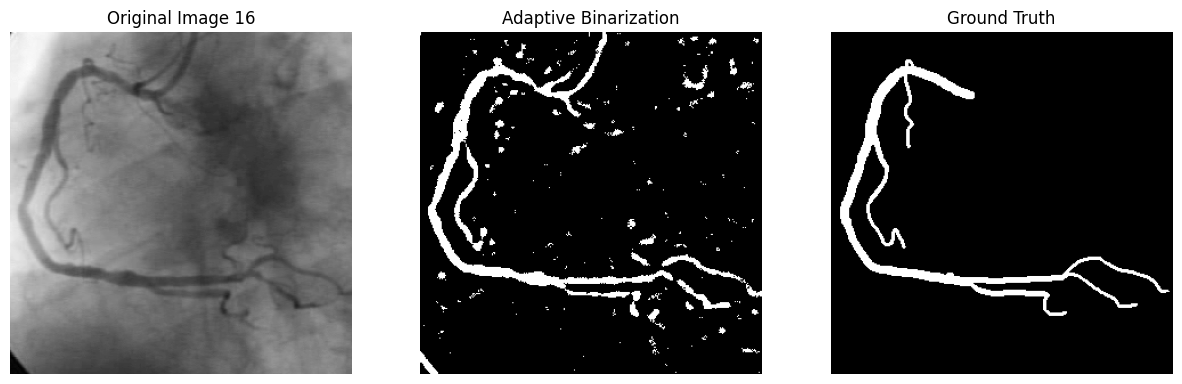

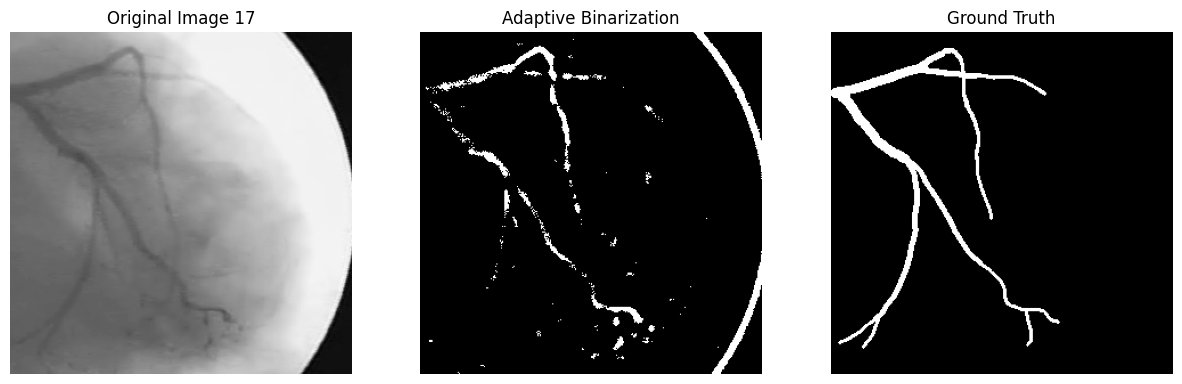

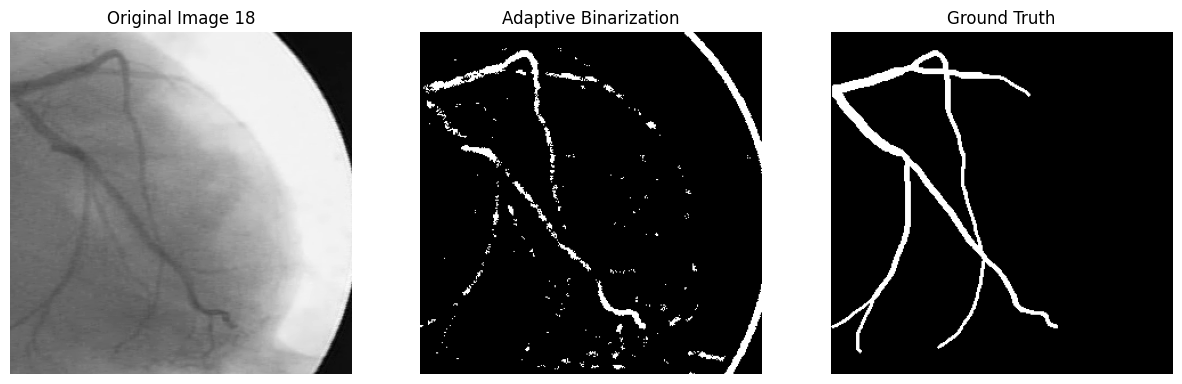

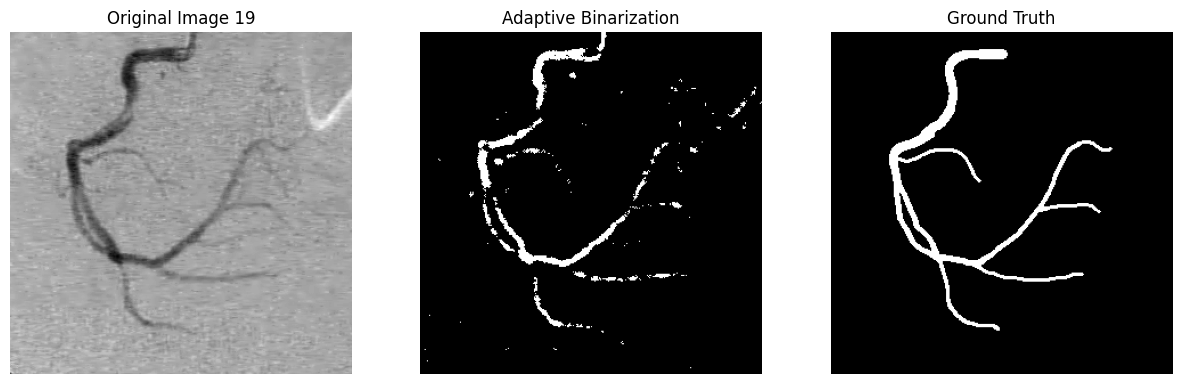

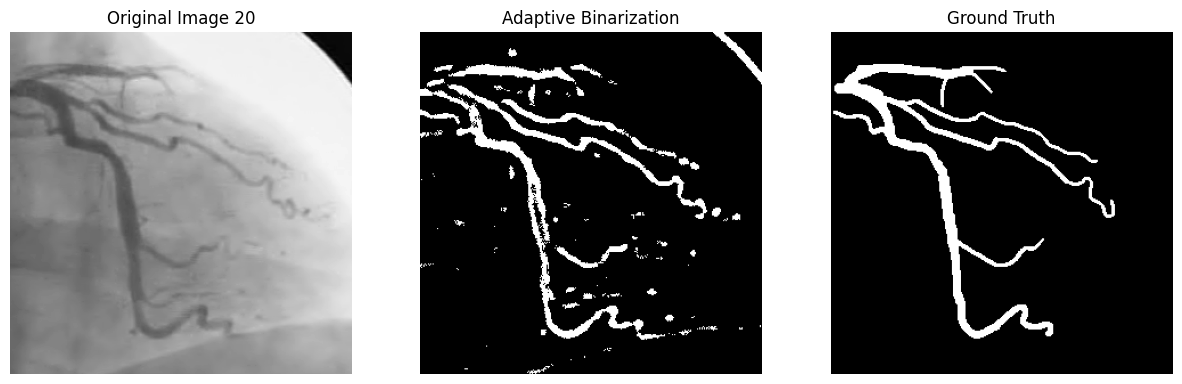


Métricas Adaptive:
Accuracy: 0.9559838888888889
F1: 0.5582561798082633
Recall/Sensitivity: 0.5952780088847546
Specificity: 0.9745154082141104
Precision: 0.5454212708163103


In [4]:
adaptive_metrics_sum = np.zeros(5)

for i in range(1, 21, 1):
    ruta = "./database/" + str(i) + ".pgm"
    ruta_analizada = "./database/" + str(i) + "_gt.pgm"
    original_image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    gt_image = cv2.imread(ruta_analizada, cv2.IMREAD_GRAYSCALE)
    gt_image_normalized = (gt_image == 255).astype(np.uint8)

    # Ecualización de histograma
    equalized_image = cv2.equalizeHist(original_image)

    # Filtración bilateral
    filtered_image = cv2.bilateralFilter(original_image, 9, 75, 75)

    # Binarización adaptativa
    adaptive_threshold = cv2.adaptiveThreshold(filtered_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptive_threshold = 255 - adaptive_threshold

    adaptive_metrics = np.array(calculate_metrics(gt_image_normalized, adaptive_threshold))
    adaptive_metrics_sum += adaptive_metrics

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title(f'Original Image {i}')
    ax[0].axis('off')

    ax[1].imshow(adaptive_threshold, cmap='gray')
    ax[1].set_title('Adaptive Binarization')
    ax[1].axis('off')

    ax[2].imshow(gt_image, cmap='gray')
    ax[2].set_title('Ground Truth')
    ax[2].axis('off')

    plt.show()

adaptive_metrics_average = adaptive_metrics_sum / 20


print('\nMétricas Adaptive:')
print('Accuracy:', adaptive_metrics_average[0])
print('F1:', adaptive_metrics_average[1])
print('Recall/Sensitivity:', adaptive_metrics_average[2])
print('Specificity:', adaptive_metrics_average[3])
print('Precision:', adaptive_metrics_average[4])



### Sauvola

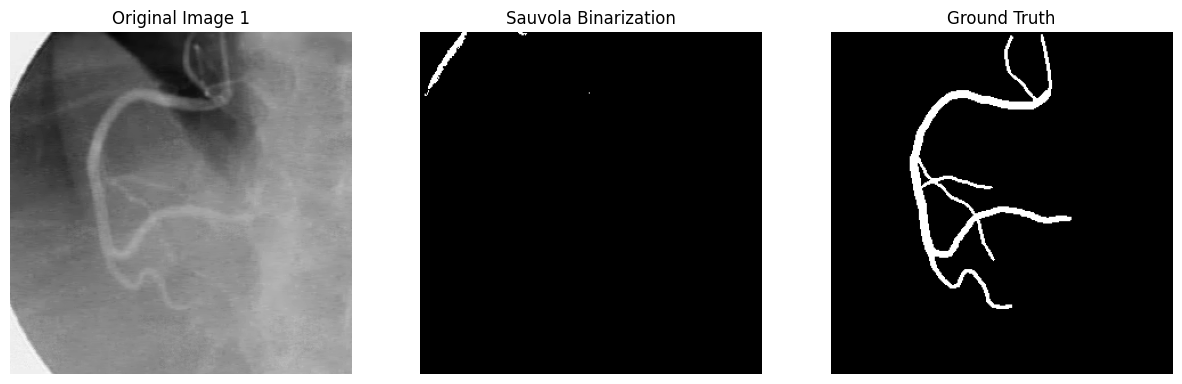

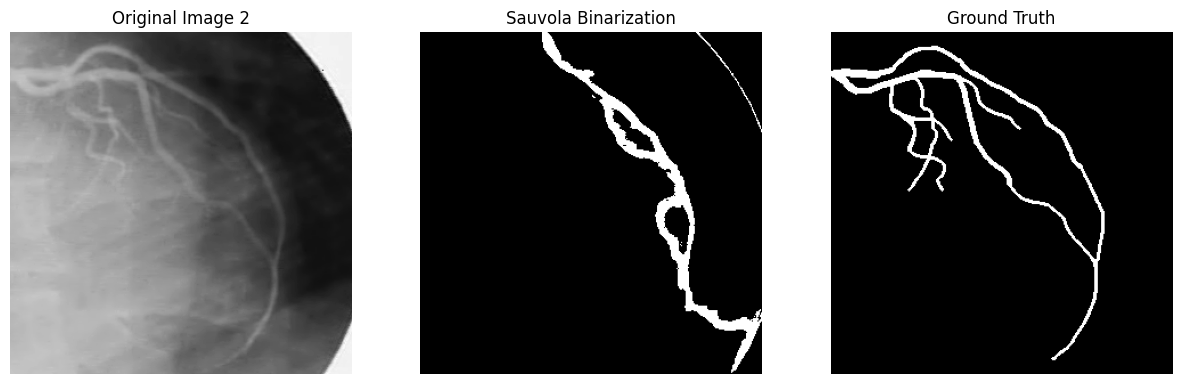

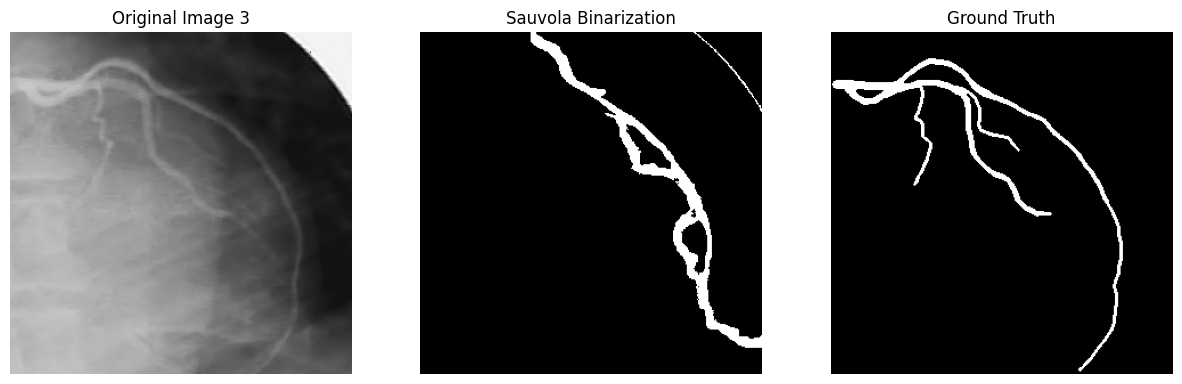

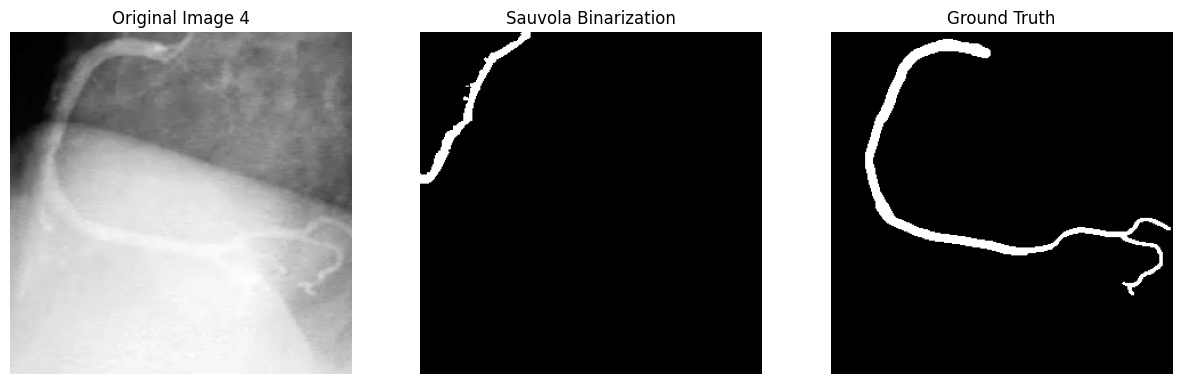

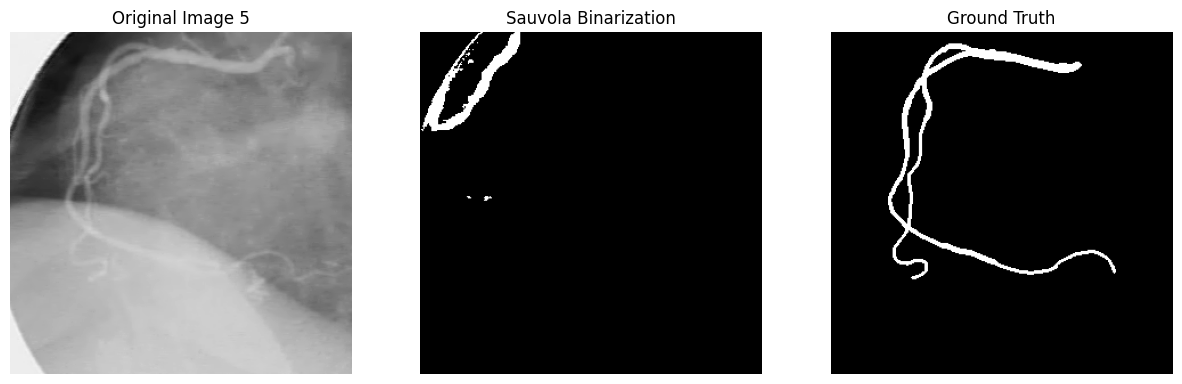

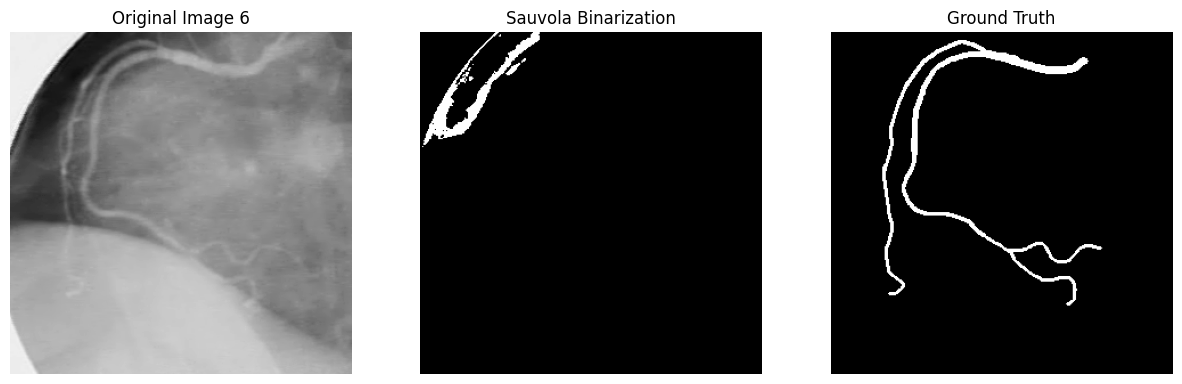

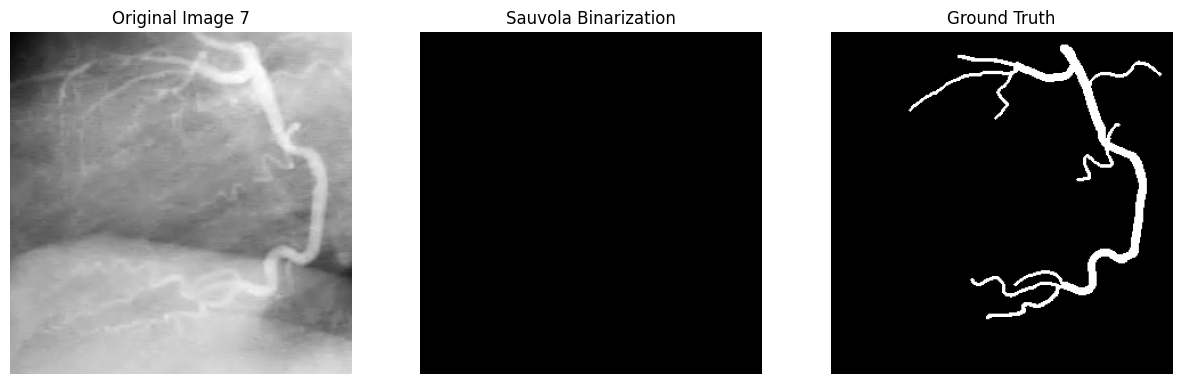

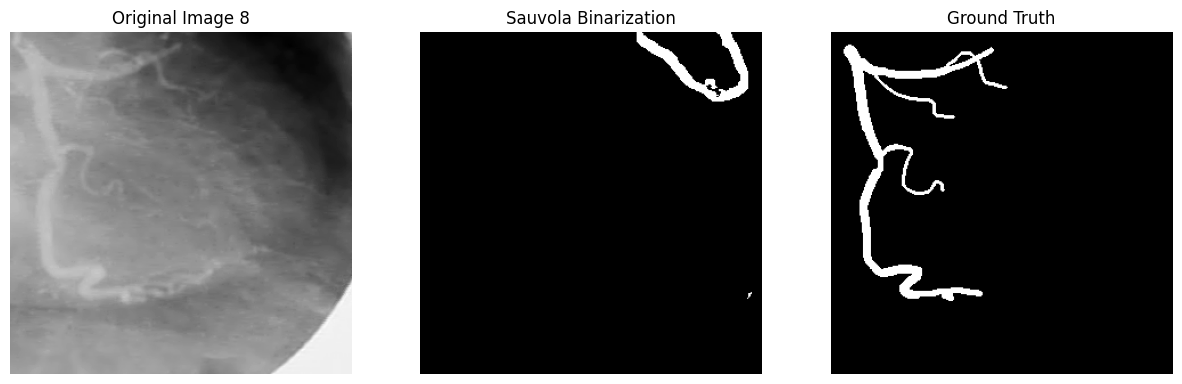

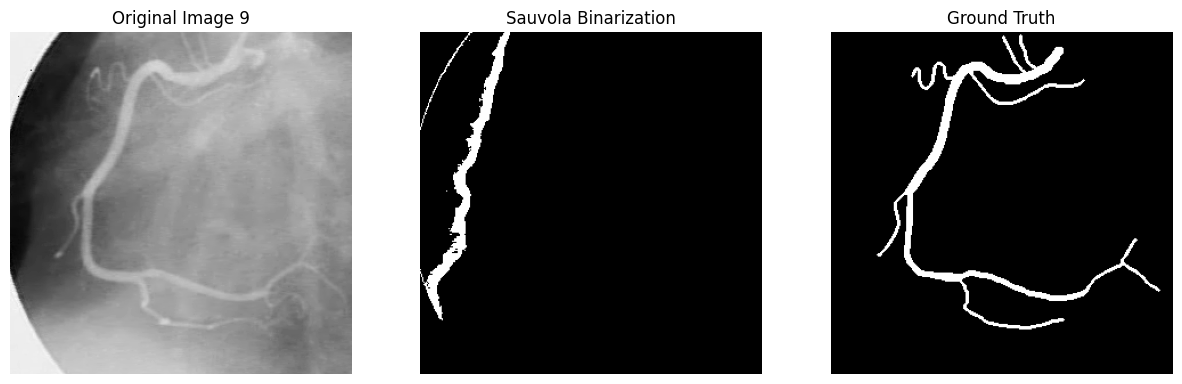

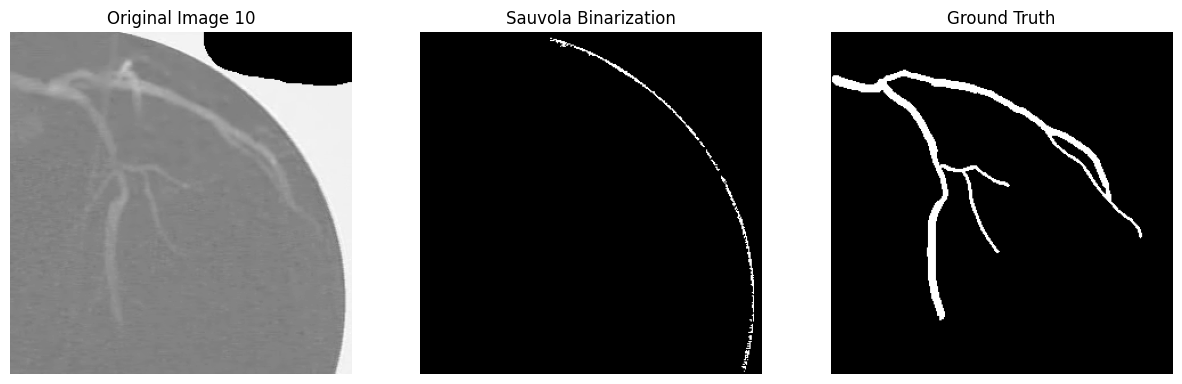

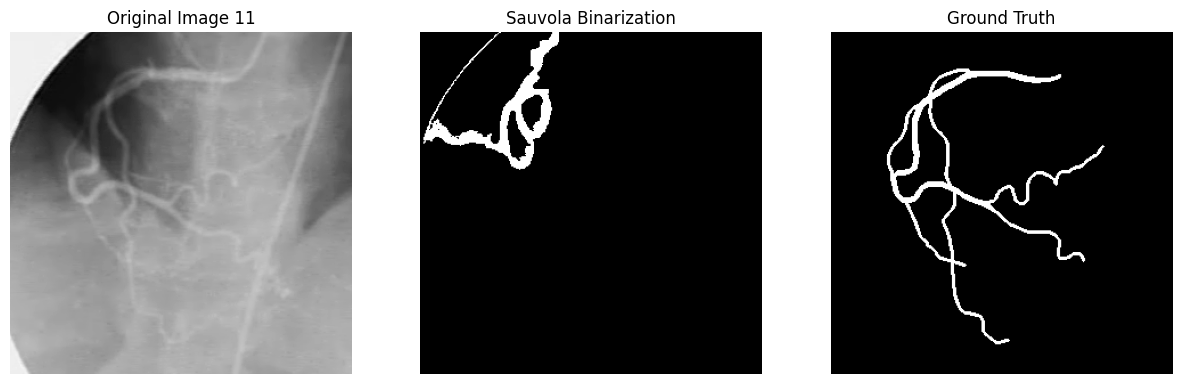

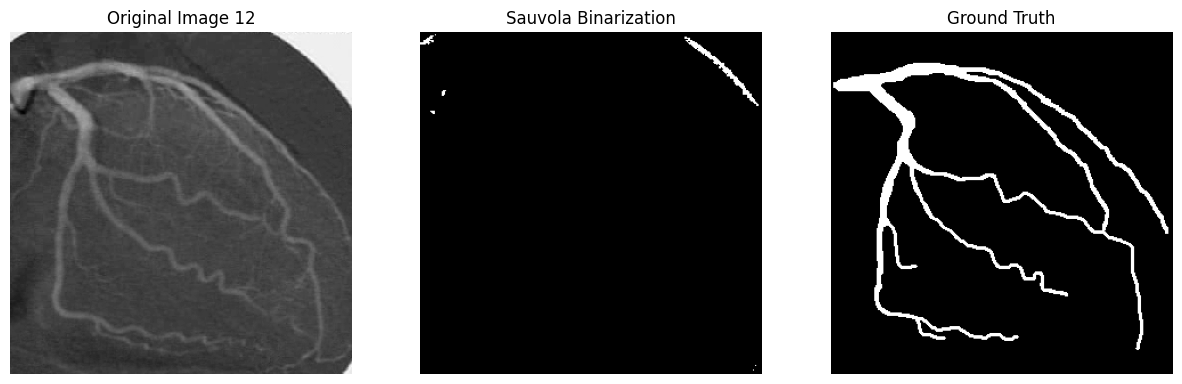

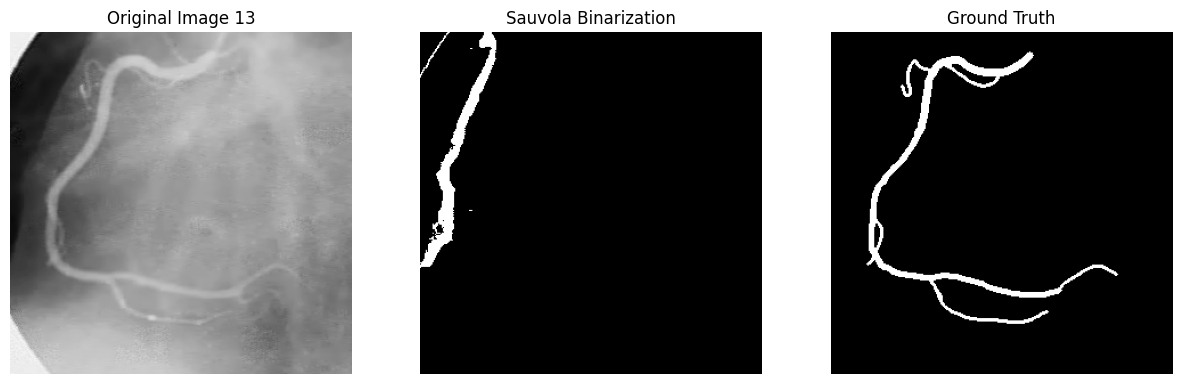

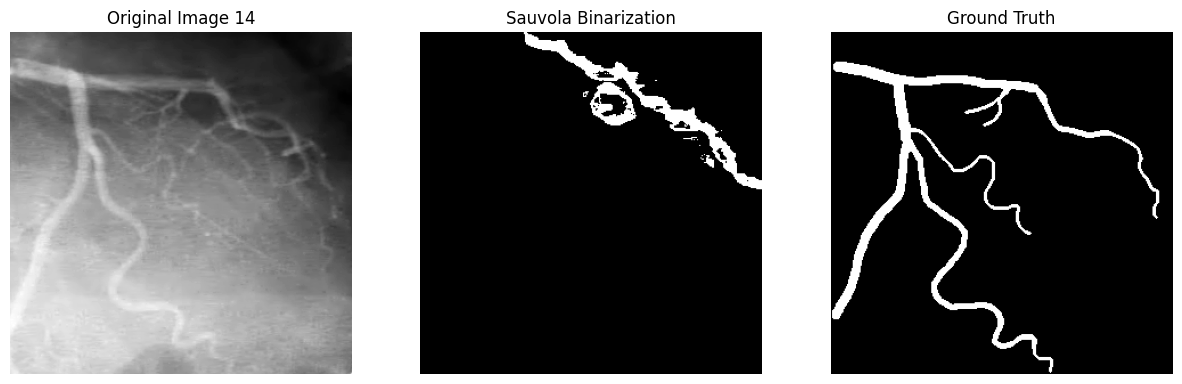

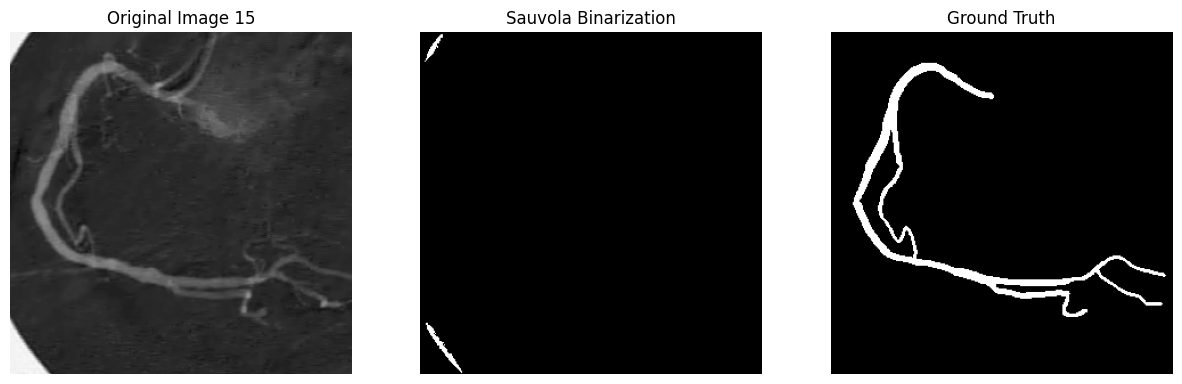

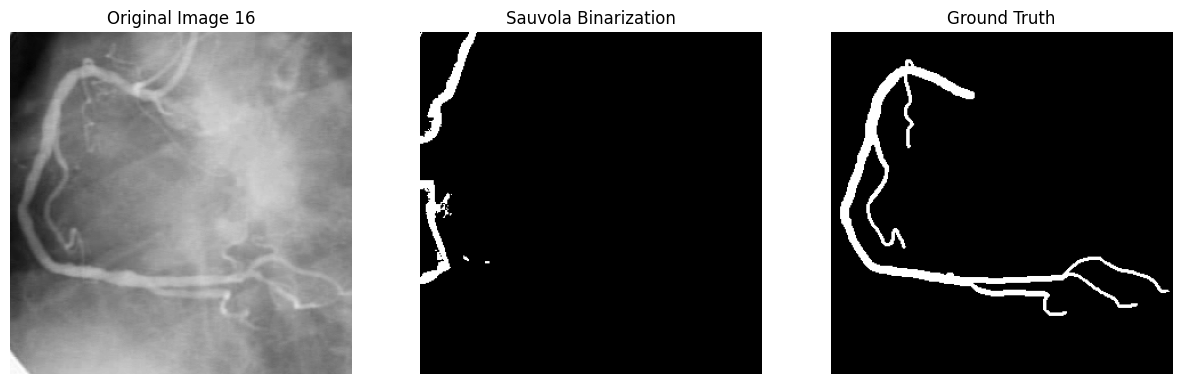

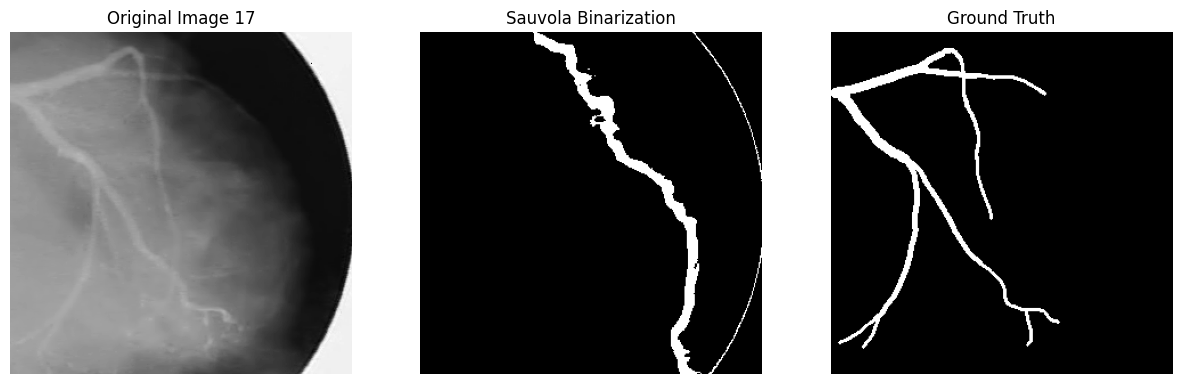

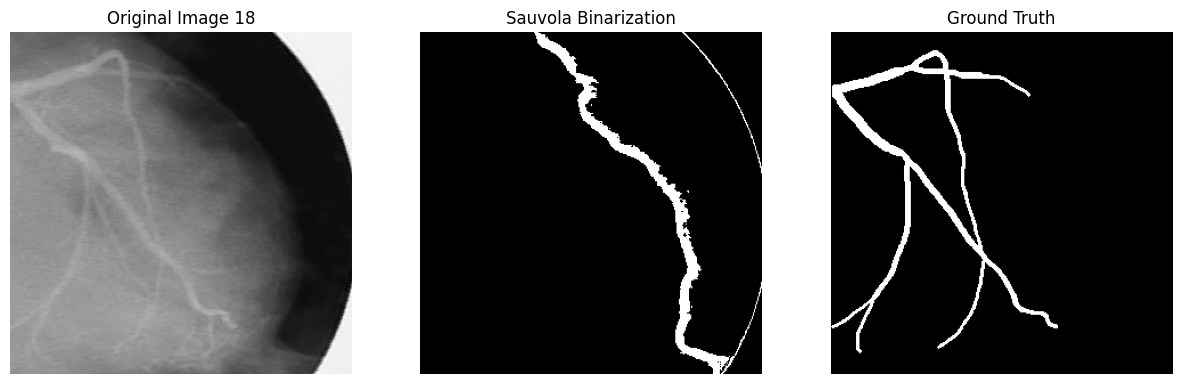

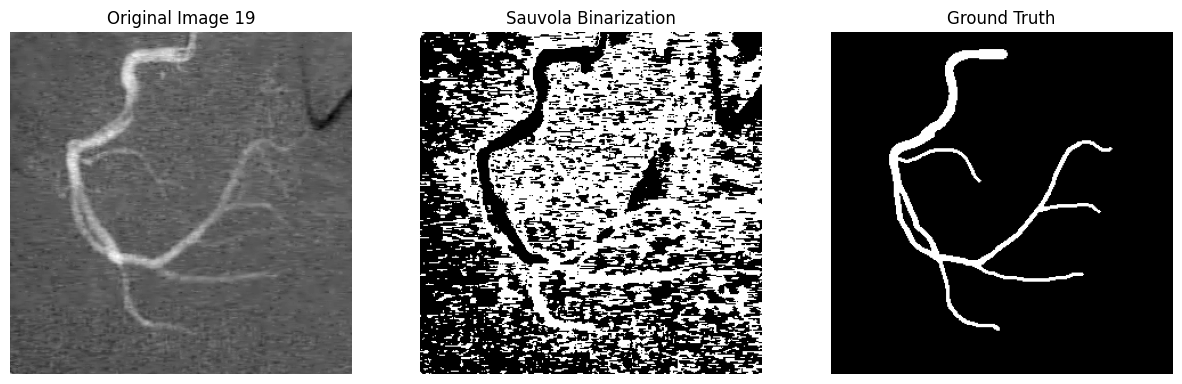

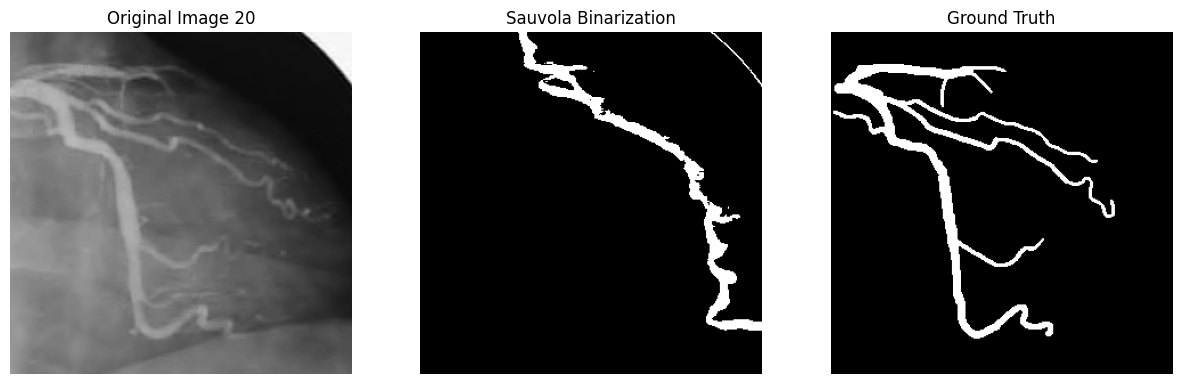


Métricas sauvola:
Accuracy: 0.8905211111111109
F1: 0.2011833981197712
Recall/Sensitivity: 0.05674913874099593
Specificity: 0.9542002535460566
Precision: 0.14485668263021018


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_sauvola
from skimage.io import imread

sauvola_metrics_sum = np.zeros(5)
umbral_minimo_intensidad = 55

for i in range(1, 21, 1):
    ruta = "./database/" + str(i) + ".pgm"
    ruta_analizada = "./database/" + str(i) + "_gt.pgm"
    original_image_gray = imread(ruta, as_gray=True) * 255
    gt_image = imread(ruta_analizada, as_gray=True) * 255

    # Umbral mínimo de intensidad
    mask = original_image_gray > umbral_minimo_intensidad
    image_for_sauvola = original_image_gray.copy()
    image_for_sauvola[~mask] = 255
    

    # Sauvola
    sauvola_thresh = threshold_sauvola(image_for_sauvola, window_size=23, k=0.4)
    sauvola_binary = (image_for_sauvola > sauvola_thresh) * 255
    sauvola_binary = 255 - sauvola_binary


    sauvola_metrics = np.array(calculate_metrics(gt_image_normalized, sauvola_binary))
    sauvola_metrics_sum += sauvola_metrics



    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(original_image_gray, cmap='gray')
    ax[0].set_title(f'Original Image {i}')
    ax[0].axis('off')

    ax[1].imshow(sauvola_binary, cmap='gray')
    ax[1].set_title('Sauvola Binarization')
    ax[1].axis('off')

    ax[2].imshow(gt_image, cmap='gray')
    ax[2].set_title('Ground Truth')
    ax[2].axis('off')

    plt.show()

sauvola_metrics_average = sauvola_metrics_sum / 20


print('\nMétricas sauvola:')
print('Accuracy:', sauvola_metrics_average[0])
print('F1:', sauvola_metrics_average[1])
print('Recall/Sensitivity:', sauvola_metrics_average[2])
print('Specificity:', sauvola_metrics_average[3])
print('Precision:', sauvola_metrics_average[4])

